## Current Python Version

Ensure the python version running in the jupyter kernel is the same as expected

In [1]:
from platform import python_version

print(python_version())

3.7.3


List installed packages, should match the ones in the pipfile (and their dependencies)

In [2]:
pip list

Package             Version
------------------- -------
astroid             2.2.5  
attrs               19.1.0 
backcall            0.1.0  
bleach              3.1.0  
cycler              0.10.0 
decorator           4.4.0  
defusedxml          0.6.0  
entrypoints         0.3    
ipykernel           5.1.1  
ipython             7.7.0  
ipython-genutils    0.2.0  
ipywidgets          7.5.1  
isort               4.3.21 
jedi                0.14.1 
Jinja2              2.10.1 
jsonschema          3.0.1  
jupyter             1.0.0  
jupyter-client      5.3.1  
jupyter-console     6.0.0  
jupyter-core        4.5.0  
kiwisolver          1.1.0  
lazy-object-proxy   1.4.1  
MarkupSafe          1.1.1  
matplotlib          3.1.1  
mccabe              0.6.1  
mistune             0.8.4  
nbconvert           5.5.0  
nbformat            4.4.0  
notebook            6.0.0  
numpy               1.17.0 
pandas              0.25.0 
pandocfilters       1.4.2  
parso               0.5.1  
pexpect             

## Internal Module Imports
Code required to enable project's internally defined modulos into the jupyter notebook environment

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from electricity import ElectricalSystem, Load, Generator
from dto import SystemHistory, NodeStatePower, COST_PRESETS

Initialize electrical system with generators and loads

In [5]:
elecSys = ElectricalSystem(50, [Load("L1", 3.15)], [
    Generator("G1", 1.5, COST_PRESETS.COAL, minPower=0.1, maxPower=6.0),
    Generator("G2", 1.5, COST_PRESETS.OIL, minPower=0.1, maxPower=4.0),
    ])

Send multiple updates (manually)

In [6]:
elecSys.updateGenerators([NodeStatePower(id_='G1', power=1.4), NodeStatePower(id_='G2', power=1.6)])
elecSys.updateGenerators([NodeStatePower(id_='G1', power=1.3), NodeStatePower(id_='G2', power=1.7)])
elecSys.updateGenerators([NodeStatePower(id_='G1', power=1.2), NodeStatePower(id_='G2', power=1.8)])
elecSys.updateGenerators([NodeStatePower(id_='G1', power=1.1), NodeStatePower(id_='G2', power=1.9)])
elecSys.updateGenerators([NodeStatePower(id_='G1', power=1.18), NodeStatePower(id_='G2', power=2)])

In [7]:
print(SystemHistory())

SystemHistory(steps=[0, 1, 2, 3, 4, 5], totalPower=[3.0, 3.0, 3.5, 2.736666666666666, 3.496022222222224, 2.962566074074071], totalLoad=[3.15, 3.15, 3.15, 3.15, 3.15, 3.15], frequency=[50, 48.5, 52.24, 47.74826666666666, 51.56876622222224, 49.44342436740739], generators={'G1': [1.5, 1.4, 1.3, 1.2, 1.1, 1.18], 'G2': [1.5, 1.6, 1.7, 1.8, 1.9, 2]}, loads={'L1': [3.15, 3.15, 3.15, 3.15, 3.15, 3.15]}, actualCosts={'G1': [520.803195, 520.0827832, 519.3623998, 518.6420448, 517.9217182, 518.497977208], 'G2': [321.779365, 322.5649664, 323.35060660000005, 324.1362856, 324.9220034, 325.70776]}, costOptimalCosts={'G1': [530.8919422, 530.8919422, 530.8919422, 530.8919422, 530.8919422, 532.189470688], 'G2': [310.7850194, 310.7850194, 310.7850194, 310.7850194, 310.7850194, 310.7850194]}, costOptimalPowers={'G1': [2.8999999999999995, 2.9, 2.9, 2.9000000000000004, 2.9000000000000004, 3.08], 'G2': [0.10000000000000009, 0.10000000000000009, 0.10000000000000009, 0.09999999999999987, 0.09999999999999964, 0.

Or, even better, **pretty** print the history values for further inspection

In [8]:
from pprint import pprint
pprint(dict(SystemHistory()._asdict()))

{'actualCosts': {'G1': [520.803195,
                        520.0827832,
                        519.3623998,
                        518.6420448,
                        517.9217182,
                        518.497977208],
                 'G2': [321.779365,
                        322.5649664,
                        323.35060660000005,
                        324.1362856,
                        324.9220034,
                        325.70776]},
 'costOptimalCosts': {'G1': [530.8919422,
                             530.8919422,
                             530.8919422,
                             530.8919422,
                             530.8919422,
                             532.189470688],
                      'G2': [310.7850194,
                             310.7850194,
                             310.7850194,
                             310.7850194,
                             310.7850194,
                             310.7850194]},
 'costOptimalPowers': {'G1': [2.8999999

Alternatively, one can plot the data to better inspect the progression

In [9]:
import matplotlib.pyplot as plt

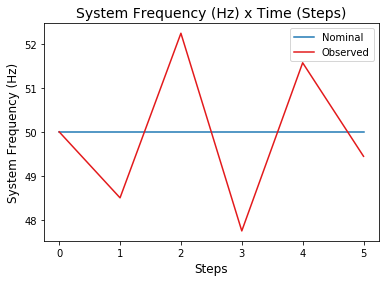

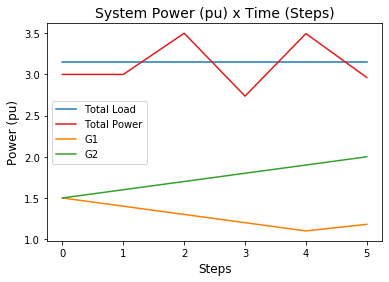

<Figure size 432x288 with 0 Axes>

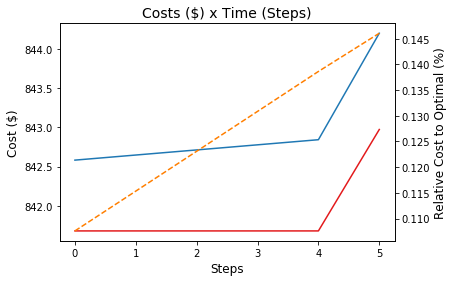

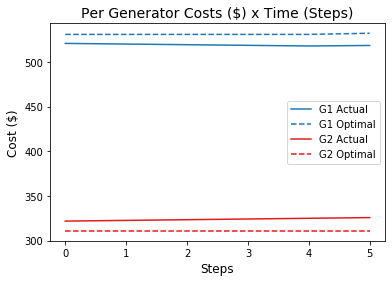

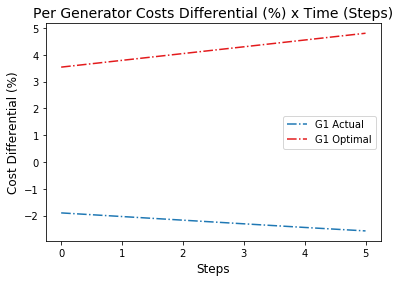

In [10]:
from plots import plotAll

plotAll()